In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,MaxPooling2D,Flatten,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Model

## Data Loading

In [2]:
cifar10 = tf.keras.datasets.cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

170500096/170498071 [==============================] - 6s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


In [3]:
num_of_classes = len(set(y_train))
print(f"Number of classes: {num_of_classes}")

Number of classes: 10


## Model

In [0]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(num_of_classes, activation='softmax')(x)

model = Model(i,x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                           height_shift_range=0.1,
                                                           horizontal_flip=True)

batch_size = 32
train_gen = data_gen.flow(X_train,y_train,batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

model.fit(train_gen,validation_data=(X_test,y_test),
          steps_per_epoch=steps_per_epoch,
          epochs=25)

Epoch 1/25
1562/1562 [==============================] - 30s 19ms/step - loss: 1.4524 - accuracy: 0.4945 - val_loss: 1.0832 - val_accuracy: 0.6155
Epoch 2/25
1562/1562 [==============================] - 29s 18ms/step - loss: 0.9921 - accuracy: 0.6531 - val_loss: 1.0835 - val_accuracy: 0.6381
Epoch 3/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.8459 - accuracy: 0.7089 - val_loss: 0.7219 - val_accuracy: 0.7553
Epoch 4/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.7556 - accuracy: 0.7440 - val_loss: 0.8017 - val_accuracy: 0.7317
Epoch 5/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6859 - accuracy: 0.7665 - val_loss: 0.8225 - val_accuracy: 0.7457
Epoch 6/25
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6363 - accuracy: 0.7848 - val_loss: 0.5804 - val_accuracy: 0.8030
Epoch 7/25
1562/1562 [==============================] - 27s 18ms/step - loss: 0.5942 - accuracy: 0.7985 - val_loss: 0.5804 -

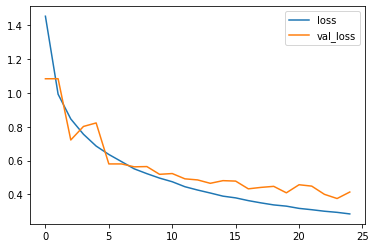

In [7]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()

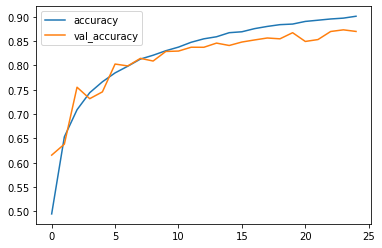

In [8]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()

In [10]:
pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1000
           1       0.93      0.95      0.94      1000
           2       0.85      0.82      0.84      1000
           3       0.77      0.75      0.76      1000
           4       0.88      0.85      0.86      1000
           5       0.91      0.70      0.80      1000
           6       0.80      0.95      0.87      1000
           7       0.88      0.94      0.91      1000
           8       0.89      0.95      0.92      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



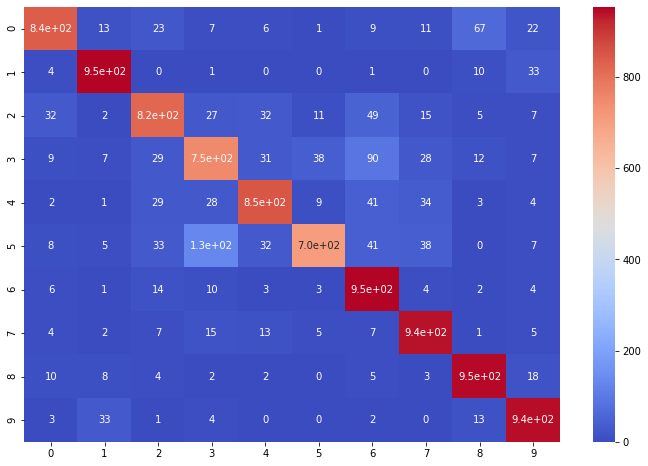

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm')